In [13]:
# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


In [14]:
# 1. Load dataset
df = pd.read_csv("movies.csv")  # Make sure your file path is correct

In [16]:


# 2. Drop rows missing important data
df = df.dropna(subset=['vote_average', 'budget', 'genres', 'original_language', 'director'])


In [17]:

# 3. Handle 'genres' column - split into list of genres for each movie
df['genre_list'] = df['genres'].apply(lambda x: x.split() if isinstance(x, str) else [])


In [18]:
# 4. Find all unique genres in dataset
unique_genres = set()
df['genre_list'].apply(unique_genres.update)


0       None
1       None
2       None
3       None
4       None
        ... 
4797    None
4798    None
4799    None
4800    None
4802    None
Name: genre_list, Length: 4759, dtype: object

In [19]:


# 5. Create one binary column per genre (1 if movie has genre, else 0)
for genre in unique_genres:
    df[genre] = df['genre_list'].apply(lambda x: 1 if genre in x else 0)

# 6. Encode 'original_language' and 'director' text columns into numbers
le_lang = LabelEncoder()
df['original_language_enc'] = le_lang.fit_transform(df['original_language'])

le_dir = LabelEncoder()
df['director_enc'] = le_dir.fit_transform(df['director'])


In [20]:
# 7. Prepare feature columns: budget, language, director, plus genre columns
feature_cols = ['budget', 'original_language_enc', 'director_enc'] + list(unique_genres)

X = df[feature_cols]       # Features for the model
y = df['vote_average']     # Target variable (movie rating)


In [21]:


# 8. Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [22]:
# 9. Create and train Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [23]:

# 10. Predict ratings on test data
y_pred = model.predict(X_test)


In [24]:

# 11. Calculate RMSE (lower is better)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"Root Mean Squared Error (RMSE) on test data: {rmse:.2f}")


Root Mean Squared Error (RMSE) on test data: 1.12


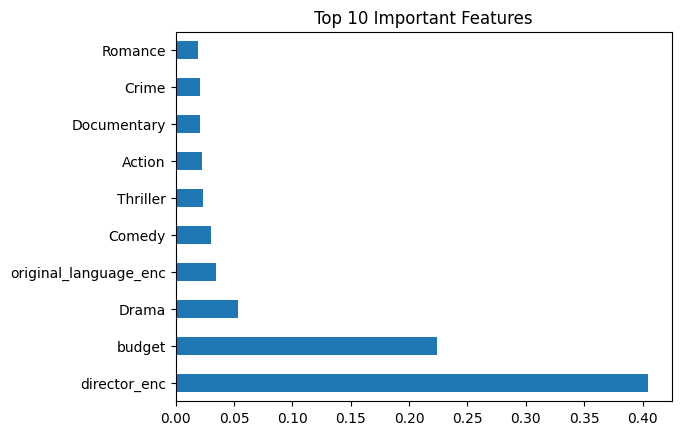

In [25]:
# 12. (Optional) Plot top 10 most important features the model used
importances = model.feature_importances_
feat_importances = pd.Series(importances, index=feature_cols)
feat_importances.nlargest(10).plot(kind='barh')
plt.title("Top 10 Important Features")
plt.show()

Root Mean Squared Error (RMSE) on test data: 1.12


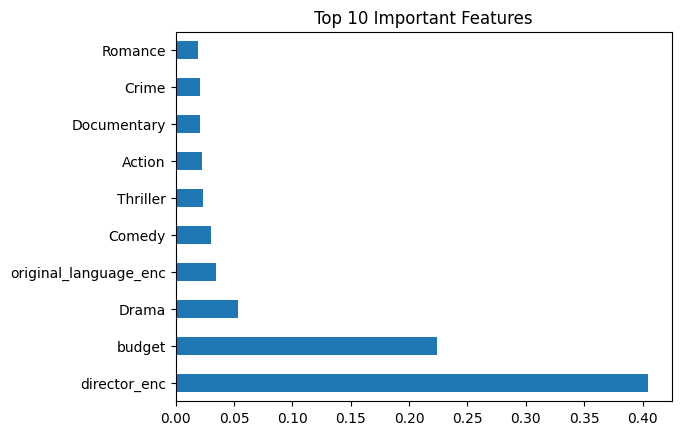

Predicted rating for the new movie: 5.79


In [12]:



# 13. Predict rating for a new movie example:
#    Example movie details:
#    budget = 150 million
#    language = English (must be in training data)
#    director = Steven Spielberg (must be in training data)
#    genres = Action and Adventure

# Convert language and director to encoded values
new_movie = {
    'budget': 150000000,
    'original_language_enc': le_lang.transform(['en'])[0],   # 'en' for English, adjust if needed
    'director_enc': le_dir.transform(['Steven Spielberg'])[0]  # must exist in your data
}

# Set genre columns: 1 if movie has genre, else 0
for genre in unique_genres:
    new_movie[genre] = 1 if genre in ['Action', 'Adventure'] else 0

new_df = pd.DataFrame([new_movie])

# Predict rating
predicted_rating = model.predict(new_df)[0]
print(f"Predicted rating for the new movie: {predicted_rating:.2f}")
